# Comparing numerical bound vs Halton sampling
We compare the dispersion indicated by VC-theory (Blumer's bound) and dispersion bound mentioned by Niedrietter and Mitchell.
We do this specifically for Halton sampling, because these sampling sequences is not determined by a maximal $N$. The other common sequences used in motion-planning follow the Halton result up to constants (e.g. Hammersley's adjustment to Halton). NOTE: we are ommitting $(t, s)$-sequences/$b$-ary net-related sets/sequences at the moment since they are not naturally incremental, and they do in fact have stronger leading coefficients on the dispersion bound.

These experiments are going to be run with dispersions in the unit cube $[0, 1]^d$.

From Mitchell, we acquire the following bound:
$$
d_N(HALT) < \left[ R_1^4 + \sum_{i=2}^s R_i^2 \right]^{1/2} N^{-1/s}, \forall N \geq \prod_{i=1}^s R_i
$$

Where $R_i$'s are the relatively prime bases used for the Halton sampling sequence. Janson said prime... we'll use the first $n$ from `sympy`. 

In [1]:
from nonasymptotic.bound import compute_vol_unit_sphere, doubling_search_over_sauer_shelah

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# What we want: a plot of desired discrepancy vs. number of points for Halton and Blumer's proof technique at varying levels of probability.
d=2
n_curve_points = 1000

In [3]:
# compute the Halton discrepancy bound
max_samples = 1e12
sp.sieve.extend_to_no(d)
halton_bases = np.array(sp.sieve._list[:d])

halton_constant = np.sqrt(halton_bases[0] ** 4 + np.sum(halton_bases[1:] ** 2))
min_halton_N = np.prod(halton_bases)

halton_n_samples = np.arange(min_halton_N, max_samples, step=(max_samples - min_halton_N) / n_curve_points)
halton_dispersion = halton_constant * (halton_n_samples ** (-1 / d))

In [4]:
# compute the Sauer-Shelah discrepancy bound with the indicated probability

# start at the cube diagonal (the largest possible dispersion, and then scale down to the smallest dispersion of halton)
success_probs = np.array([0.1, 0.3, 0.7, 0.9, 0.95])
blumer_dispersion = np.linspace(0.5, halton_dispersion[-1], num=n_curve_points)
rhos = compute_vol_unit_sphere(d) * blumer_dispersion ** d
blumer_n_samples = np.array([
    [doubling_search_over_sauer_shelah(_rho, d + 1, _success_prob) 
     for _rho in rhos] for _success_prob in success_probs
])


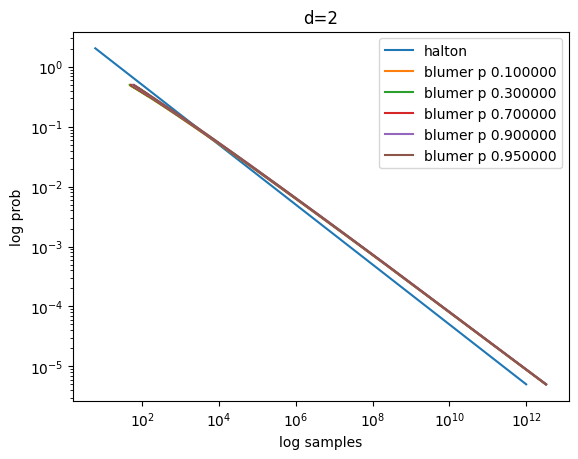

In [8]:
plt.figure()
plt.plot(halton_n_samples, halton_dispersion, label='halton')
for i in range(len(success_probs)):
    plt.plot(blumer_n_samples[i], blumer_dispersion, label='blumer p %f' % success_probs[i])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('log prob')
plt.xlabel('log samples')
plt.title('d=2')
plt.plot()
plt.legend()
plt.show()

In [6]:
blumer_dispersion

array([5.00000000e-01, 4.99499505e-01, 4.98999009e-01, 4.98498514e-01,
       4.97998018e-01, 4.97497523e-01, 4.96997027e-01, 4.96496532e-01,
       4.95996036e-01, 4.95495541e-01, 4.94995045e-01, 4.94494550e-01,
       4.93994054e-01, 4.93493559e-01, 4.92993063e-01, 4.92492568e-01,
       4.91992072e-01, 4.91491577e-01, 4.90991081e-01, 4.90490586e-01,
       4.89990090e-01, 4.89489595e-01, 4.88989099e-01, 4.88488604e-01,
       4.87988108e-01, 4.87487613e-01, 4.86987117e-01, 4.86486622e-01,
       4.85986126e-01, 4.85485631e-01, 4.84985135e-01, 4.84484640e-01,
       4.83984144e-01, 4.83483649e-01, 4.82983153e-01, 4.82482658e-01,
       4.81982162e-01, 4.81481667e-01, 4.80981171e-01, 4.80480676e-01,
       4.79980180e-01, 4.79479685e-01, 4.78979189e-01, 4.78478694e-01,
       4.77978198e-01, 4.77477703e-01, 4.76977207e-01, 4.76476712e-01,
       4.75976216e-01, 4.75475721e-01, 4.74975225e-01, 4.74474730e-01,
       4.73974234e-01, 4.73473739e-01, 4.72973243e-01, 4.72472748e-01,
      